In [1]:
from pandas_datareader import data 
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np 
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error 
from math import sqrt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set()

In [3]:
def getDataYahoo(symbols,start_date,end_date,paraCol):
    data_source="yahoo"
    panel_data = data.DataReader(symbols, data_source, start_date, end_date)
    df_tmp = panel_data[str(paraCol)]
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
    df_tmp = df_tmp.reindex(all_weekdays)
    df_clean = dataCleaning(df_tmp)
    return df_clean

def dataCleaning(df):
    df_tmp = df.fillna(method="ffill")
    df_clean = df_tmp.fillna(method="bfill")
    return df_clean

def plotScatterMulti(df,t="",x="",y="",polyDegree=1):
    global beta,alpha
    df.plot(kind='scatter',x=str(x),y=str(y),title=t)
    beta,alpha = np.polyfit(df[str(x)],df[str(y)],polyDegree) 
    plt.plot(df[str(x)], beta*df[str(x)] + alpha,'-', color='r')
    # plt.show()

def plotData(df,title="",x="",y=""):
    ax = df.plot(title=title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    # plt.show()

In [4]:
class LinRegMachineLearner:
    def __init__(self):
        pass
    
    def train(self,x , y):
        regr = linear_model.LinearRegression()
        regr.fit(x[:, np.newaxis], y[:, np.newaxis])
        self.coef = regr.coef_
        self.int = regr.intercept_
        print "Training done."
    
    def predict(self,x):
        print "Prediction done."
        regr = linear_model.LinearRegression()
        regr.coef_ = self.coef
        regr.intercept_ = self.int
        result = regr.predict(x[:, np.newaxis])
        result = np.squeeze(result)
        return result

In [5]:
train_start_date = '2017-01-01'
train_end_date = '2017-02-013'
test_start_date = '2017-02-14'
test_end_date = '2017-02-22'

In [6]:
X = data.DataReader("AAPL", "yahoo", test_start_date, test_end_date)

In [7]:
X_Train = getDataYahoo("AAPL",train_start_date,train_end_date,"Open").as_matrix()
Y_High_Train = getDataYahoo("AAPL",train_start_date,train_end_date,"High").as_matrix()
Y_Low_Train = getDataYahoo("AAPL",train_start_date,train_end_date,"Low").as_matrix()
Y_Close_Train = getDataYahoo("AAPL",train_start_date,train_end_date,"Close").as_matrix()
Y_AdjClose_Train = getDataYahoo("AAPL",train_start_date,train_end_date,"Adj Close").as_matrix()

In [8]:
X_Test = getDataYahoo("AAPL",test_start_date,test_end_date,"Open").as_matrix()
Y_True_High = getDataYahoo("AAPL",test_start_date,test_end_date,"High").as_matrix()
Y_True_Low = getDataYahoo("AAPL",test_start_date,test_end_date,"Low").as_matrix()
Y_True_Close = getDataYahoo("AAPL",test_start_date,test_end_date,"Close").as_matrix()
Y_True_AdjClose = getDataYahoo("AAPL",test_start_date,test_end_date,"Adj Close").as_matrix()

In [9]:
High_Machine = LinRegMachineLearner()
Low_Machine = LinRegMachineLearner()
Close_Machine = LinRegMachineLearner()
AdjClose_Machine = LinRegMachineLearner()

High_Machine.train(X_Train,Y_High_Train)
Low_Machine.train(X_Train,Y_Low_Train)
Close_Machine.train(X_Train,Y_Close_Train)
AdjClose_Machine.train(X_Train,Y_AdjClose_Train)

Training done.
Training done.
Training done.
Training done.


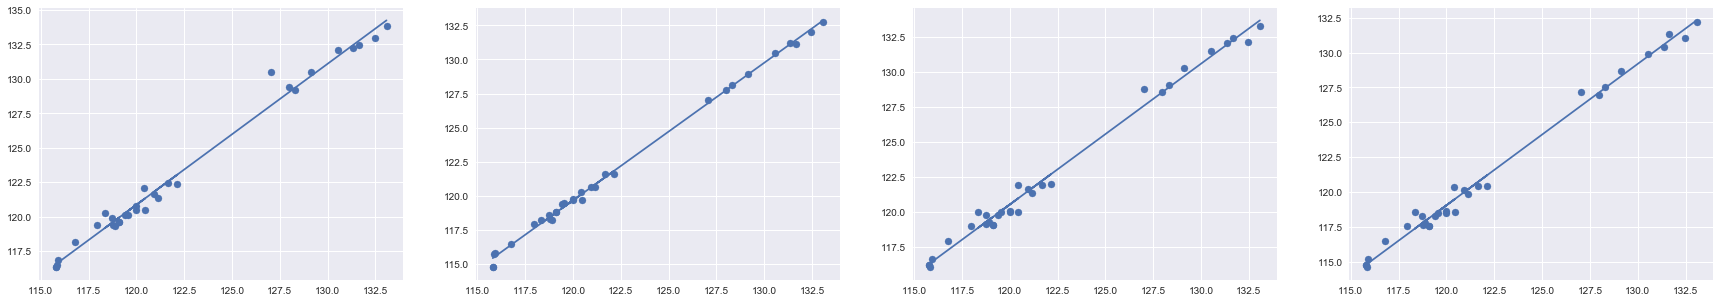

In [10]:
plt.figure(figsize=(30,5))

plt.subplot(141)
plt.scatter(X_Train,Y_High_Train)
beta,alpha = np.polyfit(X_Train,Y_High_Train,1) 
plt.plot(X_Train, beta*X_Train + alpha,'-')

plt.subplot(142)
plt.scatter(X_Train,Y_Low_Train)
beta,alpha = np.polyfit(X_Train,Y_Low_Train,1) 
plt.plot(X_Train, beta*X_Train + alpha,'-')

plt.subplot(143)
plt.scatter(X_Train,Y_Close_Train)
beta,alpha = np.polyfit(X_Train,Y_Close_Train,1) 
plt.plot(X_Train, beta*X_Train + alpha,'-')

plt.subplot(144)
plt.scatter(X_Train,Y_AdjClose_Train)
beta,alpha = np.polyfit(X_Train,Y_AdjClose_Train,1) 
plt.plot(X_Train, beta*X_Train + alpha,'-')

In [11]:
Y_High_Test = High_Machine.predict(X_Test)
Y_Low_Test = Low_Machine.predict(X_Test)
Y_Close_Test = Close_Machine.predict(X_Test)
Y_AdjClose_Test = AdjClose_Machine.predict(X_Test)

Prediction done.
Prediction done.
Prediction done.
Prediction done.


MSE -  0.62468205833  [High Predicition]
MSE -  0.381758148195 [Low Predicition]
MSE -  0.563387337881 [Close Predicition]
MSE -  0.580048142053 [Adj Close Predicition]


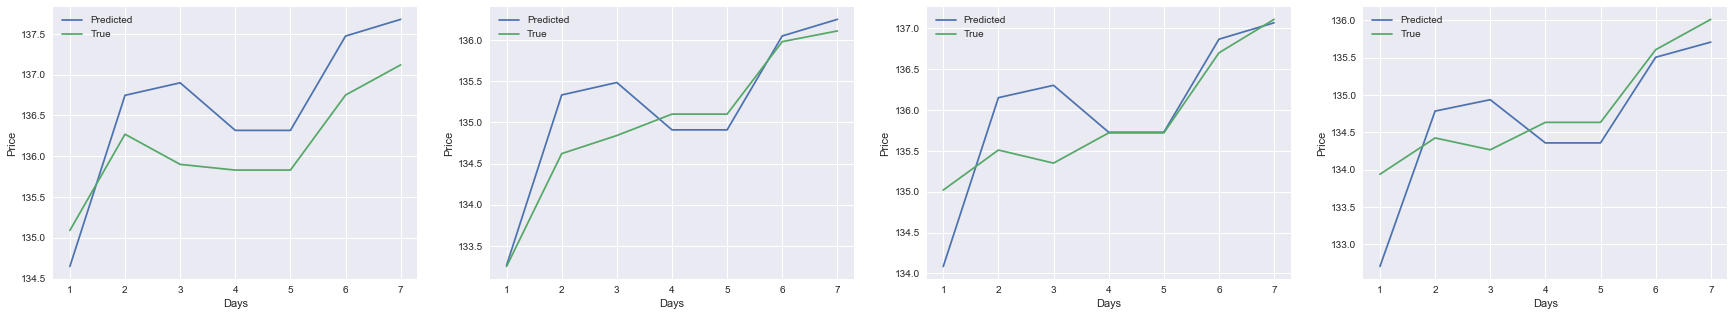

In [12]:
plt.figure(figsize=(30,5))
X = np.array([1,2,3,4,5,6,7])
print "MSE - " , sqrt(mean_squared_error(Y_True_High,Y_High_Test)), " [High Predicition]"
print "MSE - " , sqrt(mean_squared_error(Y_True_Low,Y_Low_Test)), "[Low Predicition]"
print "MSE - " , sqrt(mean_squared_error(Y_True_Close,Y_Close_Test)), "[Close Predicition]"
print "MSE - " , sqrt(mean_squared_error(Y_True_AdjClose,Y_AdjClose_Test)), "[Adj Close Predicition]"


plt.subplot(141)
a1,=plt.plot(X,Y_High_Test, label="Predicted")
a2,=plt.plot(X,Y_True_High, label="True")
plt.legend(handles=[a1, a2])
plt.title = "High Predicted"
plt.xlabel('Days')
plt.ylabel('Price')

plt.subplot(142)
b1,=plt.plot(X,Y_Low_Test, label="Predicted")
b2,=plt.plot(X,Y_True_Low, label="True")
plt.legend(handles=[b1, b2])
plt.title = "Low Predicted"
plt.xlabel('Days')
plt.ylabel('Price')

plt.subplot(143)
c1,=plt.plot(X,Y_Close_Test, label="Predicted")
c2,=plt.plot(X,Y_True_Close, label="True")
plt.legend(handles=[c1, c2])
plt.title = "Close Predicted"
plt.xlabel('Days')
plt.ylabel('Price')

plt.subplot(144)
d1,=plt.plot(X,Y_AdjClose_Test, label="Predicted")
d2,=plt.plot(X,Y_True_AdjClose, label="True")
plt.legend(handles=[d1, d2])
plt.title = "Adj Close Predicted"
plt.xlabel('Days')
plt.ylabel('Price')

In [15]:
totalStock = np.zeros((35), dtype = np.float_)
j = 0
for i in range(0,35,5):
    totalStock[i] = X_Test[j]
    totalStock[i+1] = Y_High_Test[j]
    totalStock[i+2] = Y_Low_Test[j]
    totalStock[i+3] = Y_Close_Test[j]
    totalStock[i+4] = Y_AdjClose_Test[j]
    j += 1
    

In [19]:
for i in range (0,7):
    print totalStock[i:i+5]
    print

[ 133.470001    134.64869572  133.2637171   134.08512996  132.70511056]

[ 134.64869572  133.2637171   134.08512996  132.70511056  135.520004  ]

[ 133.2637171   134.08512996  132.70511056  135.520004    136.74676766]

[ 134.08512996  132.70511056  135.520004    136.74676766  135.3324745 ]

[ 132.70511056  135.520004    136.74676766  135.3324745   136.15120984]

[ 135.520004    136.74676766  135.3324745   136.15120984  134.78450843]

[ 136.74676766  135.3324745   136.15120984  134.78450843  135.669998  ]



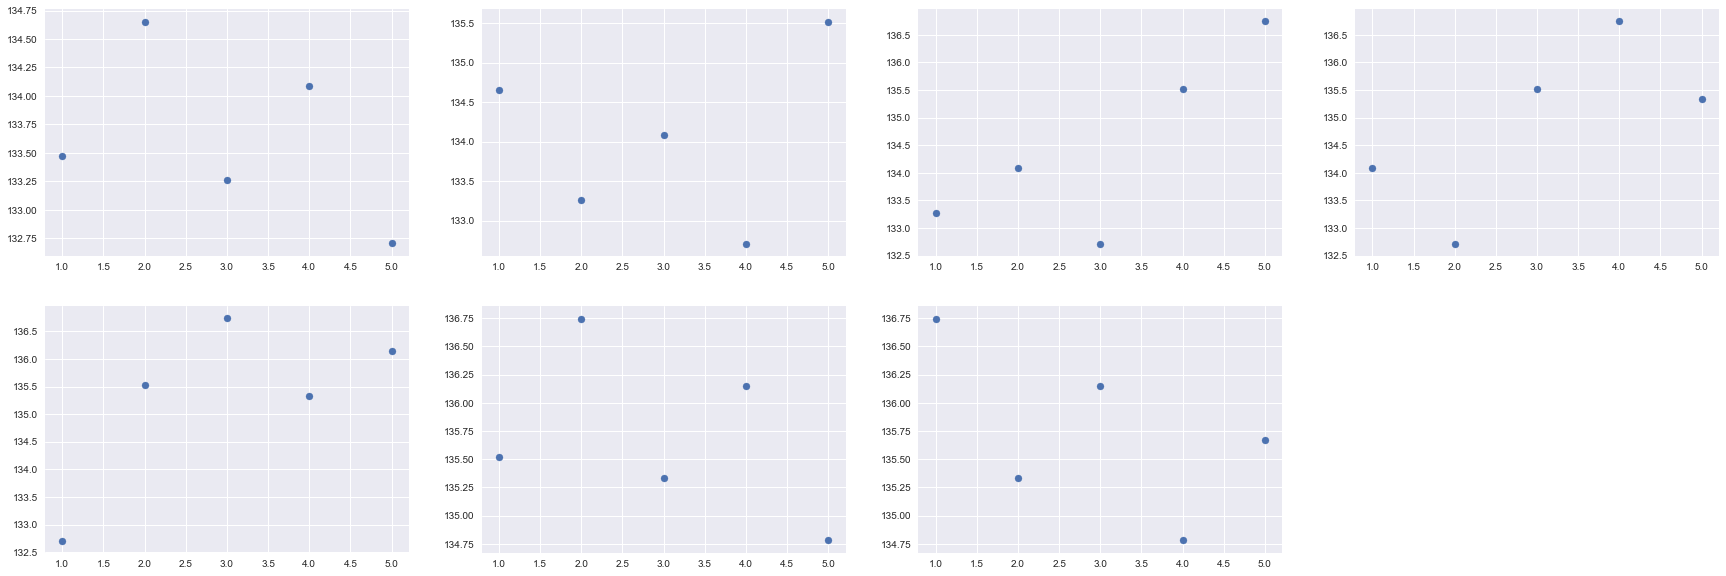

In [20]:
plt.figure(figsize=(30,10))
subNo = 241
newStock = np.zeros((5), dtype = np.float_)
X1 = np.array([1,2,3,4,5])
for i in range(0,7):
    plt.subplot(subNo)
    newStock[0:5] = totalStock[i:i+5]
    plt.scatter(X1,newStock)
    subNo += 1

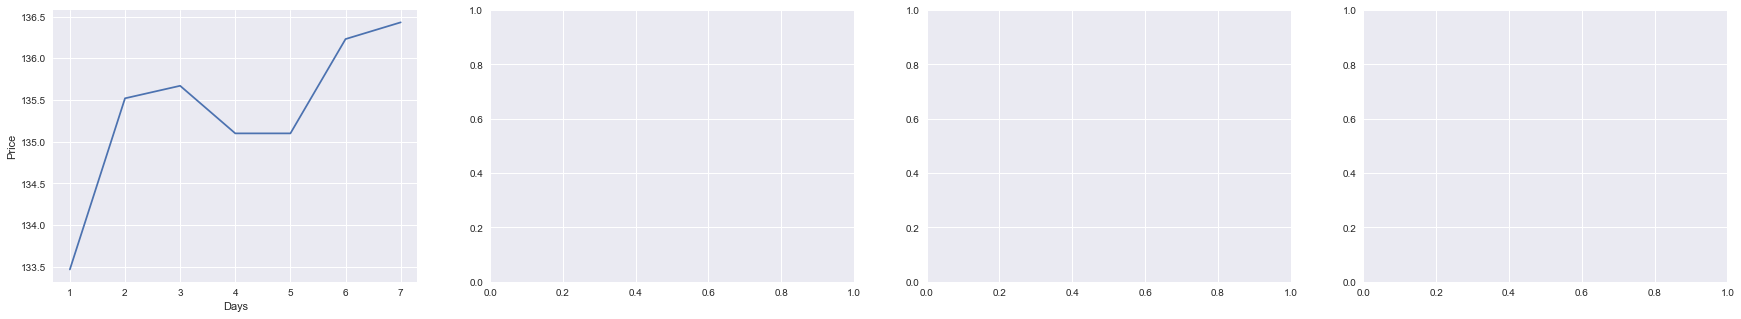

In [26]:
plt.figure(figsize=(30,5))
X2 = np.array([1,2,3,4,5,6,7])
plt.subplot(141)
plt.plot(X2,X_Test, label="Open")
plt.title = "Open"
plt.xlabel('Days')
plt.ylabel('Price')
plt.subplot(142)

plt.subplot(143)

plt.subplot(144)


In [30]:
allDF = pd.DataFrame()

[-0.44130028  0.47676366  1.00028475  0.48691945  0.48691945  0.72340771
  0.55809928]


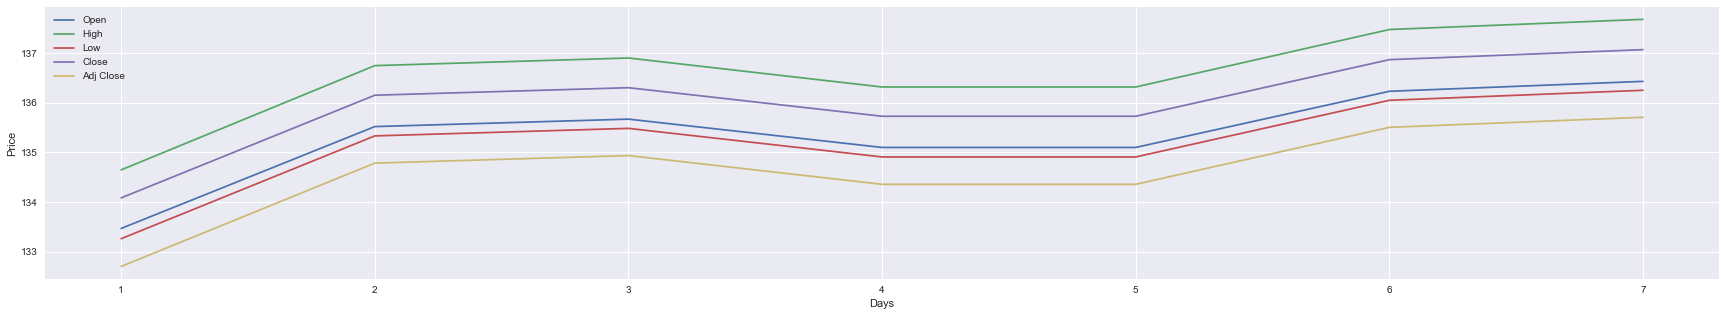

In [31]:
plt.figure(figsize=(30,5))
X2 = np.array([1,2,3,4,5,6,7])
z1,=plt.plot(X2,X_Test, label="Open")
z2,=plt.plot(X2,Y_High_Test, label="High")
z3,=plt.plot(X2,Y_Low_Test, label="Low")
z4,=plt.plot(X2,Y_Close_Test, label="Close")
z5,=plt.plot(X2,Y_AdjClose_Test, label="Adj Close")
plt.legend(handles=[z1, z2, z3, z4, z5])
plt.xlabel('Days')
plt.ylabel('Price')


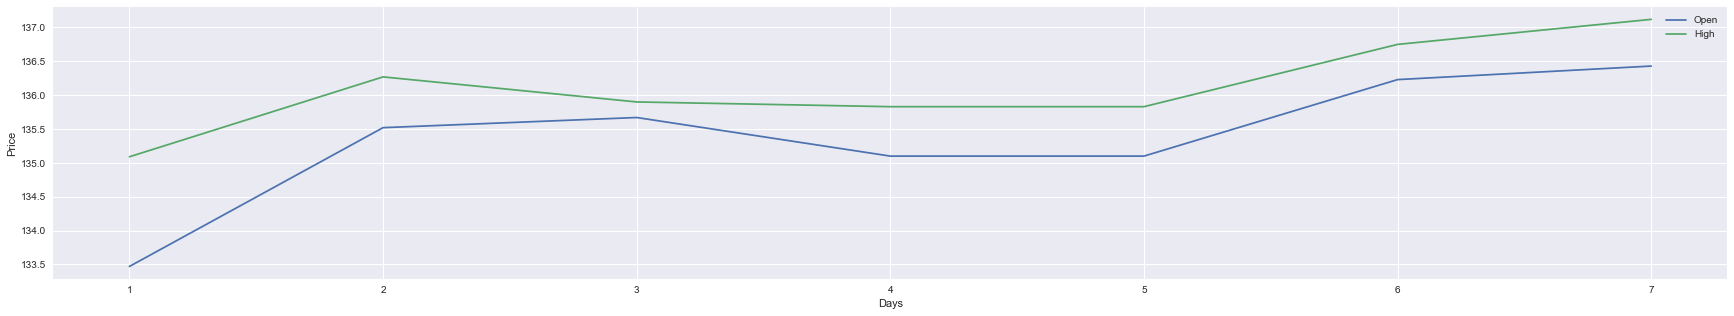

In [34]:
plt.figure(figsize=(30,5))
X2 = np.array([1,2,3,4,5,6,7])
z11,=plt.plot(X2,X_Test, label="Open")
z21,=plt.plot(X2,Y_True_High, label="High")
# z31,=plt.plot(X2,Y_True_Low, label="Low")
# z41,=plt.plot(X2,Y_True_Close, label="Close")
# z51,=plt.plot(X2,Y_True_AdjClose, label="Adj Close")
plt.legend(handles=[z11, z21])
plt.xlabel('Days')
plt.ylabel('Price')